# What are the disparities in aircraft accidents in Brazil?

#### Group Name: G3

#### Name(s) & ID(s) of Group Members:


*   Beatriz Gomes - up202300585
*   Danillo Rodrigues -  up202300683
*   Guilherme Soares - up202302425
*   Mariana Lobão - up202004260

### Table of Contents
- 1.Inference for categorical data: Testing for goodness of fit using chi-square
  - 1.1 - Research Question 1
  - 1.2 - Variable Choice
  - 1.3 - Data Cleaning Steps
  - 1.4 - Data Exploration
  - 1.5 - Interpreting plots and contigency table
  - 1.6 - Hypotesis
  - 1.7 - Chi-square Statistical Test
  - 1.8 - Summary and Conclusions

- 2.Inference for numerical data: Comparing many means with ANOVA
  - 2.1 - Research Question 2
  - 2.2 - Variable Choice
  - 2.3 - Graphical diagnostics for an ANOVA analysis
  - 2.4 - Hypotesis
  - 2.5 - F-Test
  - 2.6 - Ploting F Distribution
  - 2.7 - Post hoc

- 3.Inference for proportion: Comparing proportions of incidents
  - 3.1 - Research Question 3
  - 3.2 - Variable Choice
  - 3.3 - Hypothesis
  - 3.4 - Proportion testing


  4.Critique and Limitations


In [1]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, chi2_contingency
import scipy.stats as stats
import matplotlib.patches as mpatches
from tabulate import tabulate
import seaborn as sns

In [ ]:
# @title
# Reading Data
aeronave = pd.read_csv("./resource/aeronave.csv", encoding='ISO-8859-1', sep=';')
recomendacao = pd.read_csv("./resource/recomendacao.csv", encoding='ISO-8859-1', sep=';')
ocorrencia = pd.read_csv("./resource/.csv", encoding='ISO-8859-1', sep=';')
ocorrencia_tipo = pd.read_csv("./resource/ocorrencia_tipo.csv", encoding='ISO-8859-1', sep=';')
fator_contribuinte = pd.read_csv("./resource/fator_contribuinte.csv",encoding='ISO-8859-1',  sep=';')

aeronave = aeronave.replace("***", pd.NA)
recomendacao = recomendacao.replace("***", pd.NA)
ocorrencia = ocorrencia.replace("***", pd.NA)
ocorrencia_tipo = ocorrencia_tipo.replace("***", pd.NA)
fator_contribuinte = fator_contribuinte.replace("***", pd.NA)

# 1. Inference for categorical data: Testing for goodness of fit using chi-square



### **Research Question 1:** "Is there a statistically significant association between the category of aircraft occurence and the presence or absence of fatalities?"

### **Choosing variables**

To shed light on the chosen topic, we conducted a exploratory analysis. This analysis included an examination of the CENIPA aeronautical accidents dataset, which contains information about many occurrences and some factors that might have contributed to them.

The chosen variables for this question were the type of aircraft occurrence, and the presence or absence of fatalities. The selection of these variables was driven by the curiosity to examine if there is any association between them, which can ultimately inform interventions and decision-making in the aviation safety landscape.

It's noteworthy that the original dataset contained 83 distinct types of aircraft occurrences, which presented a formidable challenge for analysis. To enhance the analytical approach and reduce complexity, these 83 types were thoughtfully merged into a more manageable set of 12 distinct categories. This merging process was conducted with a focus on capturing the underlying similarities between occurrence types, thereby facilitating a more structured and insightful examination of their relationship with fatalities.

In the subsequent sections, we will delve into the key findings that emerged from our exploratory analysis and statistical tests. These findings not only address our research question but also offer valuable insights into the practical implications of the results.

### **Data Cleaning Steps**

*   Drop irrelevant features in our dataset
*   Check and rename/ modify some column names
*   Check for missing values
*   Merging similar categories
*   Remove all the rows with missing values
*   Random sampling of the dataset for `n=3000` rows

In [3]:
# @title
#Cleaning ocorrencia_tipo

# List of column names to keep
column_names = ['codigo_ocorrencia1', 'ocorrencia_tipo_categoria']

# Filter the DataFrame to include only the specified columns
filtered_ocorrencia_tipo = ocorrencia_tipo[column_names]
#print(filtered_ocorrencia_tipo.count())

# Use dropna to remove rows with missing values in specific columns
filtered_ocorrencia_tipo = filtered_ocorrencia_tipo.dropna(subset=column_names)
#print(filtered_ocorrencia_tipo.count())

# Define the mapping of categories to groups
category_to_group = {
      #"*** COLISÃO EM VOO COM OBSTÁCULO (excluir)": "",
      #"*** SAÍDA DE PISTA - (excluir)": "",
      "AERÓDROMO": "Others/Miscellaneous",
      "COLISÃO COM AVE": "Animal Collisions",
      "COLISÃO COM FAUNA": "Animal Collisions",
      "COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO": "Runway and Landing Issues",
      "COLISÃO NO SOLO": "Runway and Landing Issues",
      "COLISÃO NO SOLO | COLISÃO COM AERONAVE NO SOLO": "Runway and Landing Issues",
      "COLISÃO NO SOLO | COLISÃO COM OBSTÁCULOS NO SOLO": "Runway and Landing Issues",
      "COM CARGAS EXTERNAS": "Others/Miscellaneous",
      "COMBUSTÍVEL": "Fuel-Related Issues",
      "COMBUSTÍVEL | PANE SECA": "Fuel-Related Issues",
      "CONTATO ANORMAL COM A PISTA |": "Runway and Landing Issues",
      "CONTATO ANORMAL COM A PISTA | POUSO BRUSCO": "Runway and Landing Issues",
      "CONTATO ANORMAL COM A PISTA | POUSO SEM TREM": "Runway and Landing Issues",
      "CORTANTE DE VENTO / TEMPESTADE": "Weather-Related Issues",
      "EVACUAÇÃO": "Others/Miscellaneous",
      "EXCURSÃO DE PISTA": "Runway and Landing Issues",
      "EXCURSÃO DE PISTA | POUSO LONGO": "Runway and Landing Issues",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | ALARME FALSO DE FOGO OU DE SUPERAQUECIMENTO": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | COM COMANDOS DE VOO": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | COM PARA-BRISAS / JANELA / PORTA": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | COM TREM DE POUSO": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | DESCOMPRESSÃO NÃO INTENCIONAL / EXPLOSIVA": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | ESTOURO DE PNEU": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | EXPLOSÃO": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | FALHA ESTRUTURAL": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | PERDA DE COMPONENTE EM VOO": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | PERDA DE COMPONENTE NO SOLO": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE | VAZAMENTO DE COMBUSTÍVEL": "System or Component Failure",
      "FALHA OU MAU FUNCIONAMENTO DO MOTOR": "Engine-Related Issues",
      "FALHA OU MAU FUNCIONAMENTO DO MOTOR | COM HÉLICE": "Engine-Related Issues",
      "FALHA OU MAU FUNCIONAMENTO DO MOTOR | COM ROTOR": "Engine-Related Issues",
      "FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR EM VOO": "Engine-Related Issues",
      "FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO MOTOR NO SOLO": "Engine-Related Issues",
      "FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQUECIMENTO": "Engine-Related Issues",
      "FOGO/FUMAÇA (PÓS-IMPACTO)": "Fire and Smoke Incidents",
      "FOGO/FUMAÇA (SEM IMPACTO)": "Fire and Smoke Incidents",
      "FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO": "Fire and Smoke Incidents",
      "FOGO/FUMAÇA (SEM IMPACTO) | FOGO NO SOLO": "Fire and Smoke Incidents",
      "FOGO/FUMAÇA (SEM IMPACTO) | FUMAÇA NA CABINE": "Fire and Smoke Incidents",
      "FORMAÇÃO DE GELO": "Weather-Related Issues",
      "GERENCIAMENTO DE TRÁFEGO AÉREO (ATM) / SERVIÇO DE COMUNICAÇÃO NAVEGAÇÃO, OU VIGILÂNCIA (CNS)": "Navigation and Air Traffic Issues",
      "IMC NÃO INTENCIONAL": "Navigation and Air Traffic Issues",
      "INCURSÃO EM PISTA": "Runway and Landing Issues",
      "INDETERMINADO": "Unknown",
      "MANOBRA ABRUPTA": "Navigation and Air Traffic Issues",
      "OPERAÇÃO A BAIXA ALTITUDE": "Navigation and Air Traffic Issues",
      "OPERAÇÕES NO SOLO": "Others/Miscellaneous",
      "OUTROS": "Others/Miscellaneous",
      "OUTROS | AERONAVE ATINGIDA POR OBJETO": "Navigation and Air Traffic Issues",
      "OUTROS | CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO": "Weather-Related Issues",
      "OUTROS | CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO": "Weather-Related Issues",
      "OUTROS | CAUSADO POR RICOCHETE": "Others/Miscellaneous",
      "OUTROS | COLISÃO DE VEÍCULO COM AERONAVE": "Runway and Landing Issues",
      "OUTROS | COM LANÇAMENTO DE CARGA": "Others/Miscellaneous",
      "OUTROS | COM LANÇAMENTO DE PESSOAS": "Others/Miscellaneous",
      "OUTROS | COM PESSOAL EM VOO": "Others/Miscellaneous",
      "OUTROS | COM TRANSPORTE DE CARGA": "Others/Miscellaneous",
      "OUTROS | CORTE INVOLUNTÁRIO DO MOTOR": "Engine-Related Issues",
      "OUTROS | DESORIENTAÇÃO ESPACIAL": "Navigation and Air Traffic Issues",
      "OUTROS | F.O.D.": "Others/Miscellaneous",
      "OUTROS | HIPÓXIA": "Health Factors",
      "OUTROS | PERDA DA CONSCIÊNCIA": "Health Factors",
      "OUTROS | POUSO EM LOCAL NÃO PREVISTO": "Runway and Landing Issues",
      "OUTROS | PROBLEMAS FISIOLÓGICOS": "Health Factors",
      "OUTROS | SOPRO DE REATOR": "Engine-Related Issues",
      "OUTROS | SOPRO DE ROTOR": "Engine-Related Issues",
      "OUTROS | VAZAMENTO DE OUTROS FLUIDOS": "System or Component Failure",
      "PERDA DE CONDIÇÕES DE SUSTENTAÇÃO EM ROTA": "Loss of Control",
      "PERDA DE CONTROLE EM VOO": "Loss of Control",
      "PERDA DE CONTROLE NO SOLO": "Loss of Control",
      "PERDA DE SEPARAÇÃO / COLISÃO EM VOO | COLISÃO DE AERONAVES EM VOO": "Navigation and Air Traffic Issues",
      "PERDA DE SEPARAÇÃO / COLISÃO EM VOO | CONTATO ANORMAL COM A PISTA": "Navigation and Air Traffic Issues",
      "PERDA DE SEPARAÇÃO / COLISÃO EM VOO | PERDA DE SEPARAÇÃO / COLISÃO EM VOO": "Navigation and Air Traffic Issues",
      "PERDA DE SEPARAÇÃO / COLISÃO EM VOO | TRÁFEGO AÉREO": "Navigation and Air Traffic Issues",
      "POUSO AQUÉM/ALÉM DA PISTA": "Runway and Landing Issues",
      "POUSO AQUÉM/ALÉM DA PISTA | POUSO ANTES DA PISTA": "Runway and Landing Issues",
      "REBOQUE DE PLANADOR": "Others/Miscellaneous",
      "RELACIONADO COM SECURITY": "Others/Miscellaneous",
      "TURBULÊNCIA": "Fuel-Related Issues",
      "VOO CONTROLADO CONTRA O TERRENO": "Navigation and Air Traffic Issues",
}

# Create a new 'category_group' column based on the mapping
filtered_ocorrencia_tipo['category_group'] = filtered_ocorrencia_tipo['ocorrencia_tipo_categoria'].map(category_to_group)

# Group by the "ocorrencia_tipo_categoria" column and count occurrences
category_counts = filtered_ocorrencia_tipo['category_group'].value_counts()

# Convert the Series to a DataFrame for better formatting
category_counts_df = category_counts.reset_index()
category_counts_df.columns = ['category_group', 'count']

# Export the DataFrame to a CSV file
#category_counts_df.to_csv('category_counts_3.csv', index=False, encoding='ISO-8859-1')

#merging ocorrencia with ocorrencia_tipo
merged_oc_ot = ocorrencia.merge(filtered_ocorrencia_tipo, on='codigo_ocorrencia1', how='left')
merged_oc_air = merged_oc_ot.merge(aeronave, on='codigo_ocorrencia2', how='left')

# List of column names to keep
column_names = ['codigo_ocorrencia1', 'codigo_ocorrencia2', 'category_group', 'aeronave_fatalidades_total']

# Filter the DataFrame to include only the specified columns
merged_df = merged_oc_air[column_names]

# Use dropna to remove rows with missing values in specific columns
merged_df = merged_df.dropna(subset=column_names)
#merged_df = merged_df.sample(n=3000, replace=False)


### **Data Exploration and Visualisation**

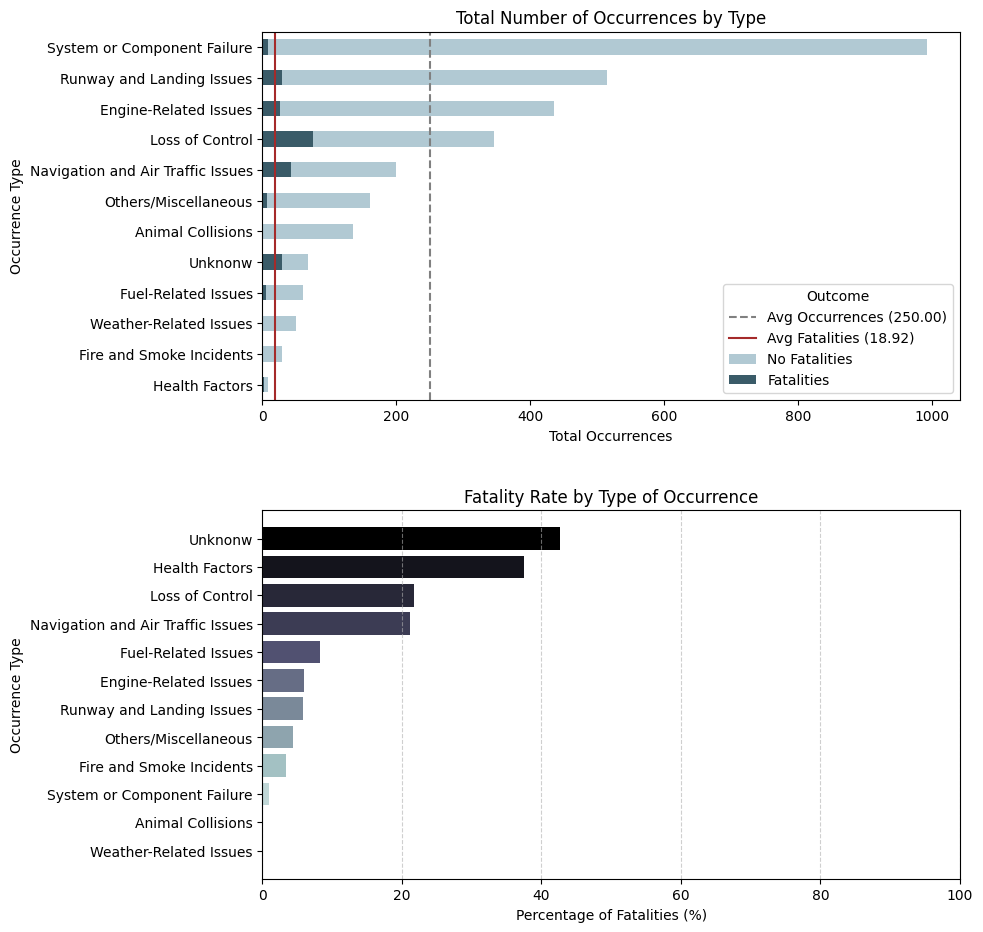

In [4]:
# @title
#Exploratory analysis of the chosen variables

merged_df = pd.read_csv('./resource/chi2_sample.csv')

# Create a new dataframe with the categories
categories_df = merged_df[['category_group']].copy()

# Count the number of rows where 'fatalities' > 0
categories_df['fatalities'] = (merged_df['aeronave_fatalidades_total'] > 0).astype(int)

# Count the number of rows where 'fatalities' = 0
categories_df['no_fatalities'] = (merged_df['aeronave_fatalidades_total'] == 0).astype(int)

# Group by 'categorie' and sum the counts
result_df = categories_df.groupby('category_group').sum().reset_index()

df = result_df

# Create a contingency table
contingency_table = df.set_index('category_group')

# Sort the categories by total counts (sum of fatalities and no fatalities)
category_counts = contingency_table[['fatalities', 'no_fatalities']].sum(axis=1)
sorted_categories = category_counts.sort_values(ascending=True)

# Calculate the mean number of total occurrences and mean number of fatalities
mean_total_occurrences = contingency_table.sum(axis=1).mean()
mean_fatalities = contingency_table['fatalities'].mean()

plt.figure(figsize=(9, 11))

# Create the first subplot
plt.subplot(2, 1, 1)
# Remove the line below
# fig, ax = plt.subplots()

colors = plt.get_cmap('bone')(np.linspace(0, 1, len(sorted_categories)))
sorted_categories.plot(kind='barh', color='#b1c9d3')
contingency_table.loc[sorted_categories.index, 'fatalities'].plot(kind='barh', color='#3A5B68')


#sorted_categories.plot(kind='barh', color='c', edgecolor='black')
#contingency_table.loc[sorted_categories.index, 'fatalities'].plot(kind='barh', color='red', edgecolor='black')

# Draw constant lines for the means
plt.axvline(mean_total_occurrences, color='gray', linestyle='--')
plt.axvline(mean_fatalities, color='brown', linestyle='-')

labels = [
    f'Avg Occurrences ({mean_total_occurrences:.2f})',
    f'Avg Fatalities ({mean_fatalities:.2f})',
    'No Fatalities',
    'Fatalities'
]
plt.xlabel('Total Occurrences')
plt.ylabel('Occurrence Type')
#title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 14}
plt.title('Total Number of Occurrences by Type', loc='center')
plt.legend(loc='lower right', title='Outcome', labels=labels)

# Create the second subplot
plt.subplot(2, 1, 2)

# Create a new DataFrame for the second bar chart
percent_fatalities = contingency_table.copy()
percent_fatalities = (percent_fatalities['fatalities'] / percent_fatalities[['fatalities', 'no_fatalities']].sum(axis=1)) * 100

# Create a horizontal bar chart, ordered by the percentage of fatalities
sorted_categories = percent_fatalities.sort_values(ascending=False)
plt.barh(sorted_categories.index, sorted_categories, color=colors)
plt.xlim(0, 100)
plt.xlabel('Percentage of Fatalities (%)')
plt.ylabel('Occurrence Type')
#title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 14}
plt.title('Fatality Rate by Type of Occurrence', loc='center')

# Add gridlines to the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Invert the y-axis to display the highest percentage at the top
plt.gca().invert_yaxis()

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.3)
plt.show()


In [5]:
# @title
# Calculate the expected values based on chi-squared test
contingency_table_c = contingency_table.copy()
expected_values = pd.DataFrame(chi2_contingency(contingency_table)[3], columns=contingency_table.columns, index=contingency_table.index)

# Add total row and column
contingency_table_c['Total'] = contingency_table_c.sum(axis=1)
contingency_table_c.loc['Total'] = contingency_table_c.sum()

expected_values['Total'] = expected_values.sum(axis=1)
expected_values.loc['Total'] = expected_values.sum()

# Reset the index column name to be blank
expected_values.index.name = None
contingency_table_c.index.name = None

# Rename columns in contingency_table
contingency_table_c.columns = ['fatalities_observed', 'no_fatalities_observed', 'total-observed']

# Rename columns in expected_values
expected_values.columns = ['fatalities_expected', 'no_fatalities_expected', 'total-expected']

# Merge dataframes using the first column (blank column)
result_table = pd.merge(expected_values, contingency_table_c, left_index=True, right_index=True)

# Reorder the columns to have observed columns first
result_table = result_table[['fatalities_observed', 'no_fatalities_observed', 'total-observed', 'fatalities_expected', 'no_fatalities_expected', 'total-expected']]

# Display the merged table
print("Merged Contingency and Expected Values Table:")
result_table

Merged Contingency and Expected Values Table:


,fatalities_observed,no_fatalities_observed,total-observed,fatalities_expected,no_fatalities_expected,total-expected
Animal Collisions,0,136,136,10.290667,125.709333,136.0
Engine-Related Issues,26,410,436,32.990667,403.009333,436.0
Fire and Smoke Incidents,1,28,29,2.194333,26.805667,29.0
Fuel-Related Issues,5,56,61,4.615667,56.384333,61.0
Health Factors,3,5,8,0.605333,7.394667,8.0
Loss of Control,75,271,346,26.180667,319.819333,346.0
Navigation and Air Traffic Issues,42,157,199,15.057667,183.942333,199.0
Others/Miscellaneous,7,154,161,12.182333,148.817667,161.0
Runway and Landing Issues,30,484,514,38.892667,475.107333,514.0
System or Component Failure,9,983,992,75.061333,916.938667,992.0


### **Interpreting Plots and Contigency Table**

In-depth analysis of the contingency table reveals crucial insights into the categories of aircraft accidents and their association with the likelihood of fatalities. Let's explore some key findings:

- **Loss of Control**: Among all categories, "Loss of Control" stands out as the most significant contributor to fatalities, with 75 occurrencies with recorded fatalities. This category is 4th in total number of occurrences (346) and 3rd in percentage of fatalities (~23%), indicating that it warrants special attention in terms of safety measures and prevention strategies. A deeper investigation into the underlying causes of these accidents is crucial.

- **Unknown Category**: The "Unknown" category, surprisingly recorded fatalities for ~42% of its total occurrences. Even though the number of occurrences was only 68, this disproportionately high percentage highlights the need for improving data collection and categorization for a more comprehensive understanding of these accidents. Enhancing reporting and investigation procedures for "Unknown" incidents could potentially lead to substantial improvements in safety.

- **Health Factors**: "Health Factors" is another category of concern, with 37% of its occurrences resulting in fatalities. Although this category has the lowest total occurrence (8), it signifies the critical role of pilot health and medical conditions in aviation safety. Addressing pilot health and ensuring regular medical evaluations may be a priority.

- **System or Component Failure**: Despite being the category with the highest number of occurrences (992), "System or Component Failure" has a relatively low fatality rate of less than 1%. This suggests that rigorous maintenance and quality control procedures for aircraft systems and components have been effective in minimizing the risk of fatalities within this category.

These interpretations provide a starting point for developing targeted safety strategies and accident prevention measures based on the specific characteristics and risk profiles of each category. It's essential to use these findings as a foundation for further investigation and decision-making in the context of aircraft safety and accident prevention.



Building upon our previous exploratory analysis, which revealed patterns and insights within our dataset, we now aim to delve deeper and scientifically assess the association between the category of aircraft occurrences and the presence or absence of fatalities. Our previous findings have guided us to further investigate this relationship.

To do so, we formulate the following hypotheses for our chi-squared test:

## **Hypothesis**
**Null Hypothesis (H0):** There is no significant association between the category of aircraft occurrences and the presence or absence of fatalities. In other words, the two variables are independent.

**Alternative Hypothesis (H1):** There is a significant association between the category of aircraft occurrences and the presence or absence of fatalities. The two variables are not independent; there is a relationship between them.

We will perform a chi-squared test to evaluate this association. This test assesses whether the observed frequencies in our contingency table significantly deviate from what would be expected if the two variables were independent.


### **Chi-square statistical test**

Degrees of freedom: 11
Chi-square statistic: 365.58715030951186
p-value: 1.2147610042624625e-71


Reject the null hypothesis (significant association between variables)




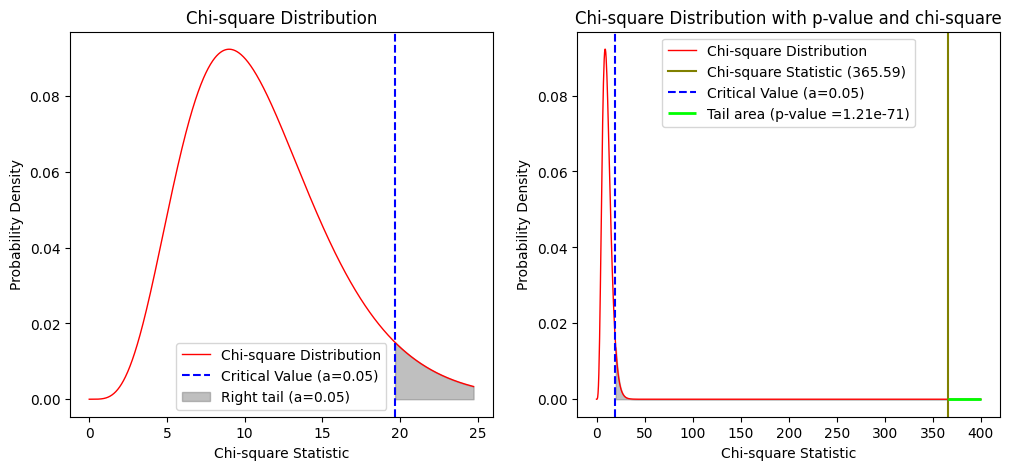

In [6]:
# @title
#Inference for categorical Data unsing Chi-square statistic test for TWO-WAY TABLES

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Calculate the chi-square statistic and p-value
chi_square, p, dof, expected = chi2_contingency(contingency_table)

# Degrees of freedom (df) for the chi-square distribution
df = (len(contingency_table.index) - 1) * (len(contingency_table.columns) - 1)
print("Degrees of freedom:", df)

# Print the chi-square statistic and p-value
print("Chi-square statistic:", chi_square)
print("p-value:", p)
print("\n")

# Set your significance level (alpha) and compare with the p-value to make a decision
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (significant association between variables)")
else:
    print("Fail to reject the null hypothesis (no significant association between variables)")
print("\n")

# Generate x values for the chi-square distribution
df = (len(contingency_table.index) - 1) * (len(contingency_table.columns) - 1)
x1 = np.linspace(0, chi2.ppf(0.99, df), 1000)

# Plot the chi-square distribution
plt.plot(x1, chi2.pdf(x1, df), 'r-', lw=1, label='Chi-square Distribution')
plt.axvline(chi2.ppf(1 - alpha, df), color='b', linestyle='--', label=f'Critical Value (a={alpha})')
plt.fill_between(x1, chi2.pdf(x1, df), where=(x1 >= chi2.ppf(1 - alpha, df)), color='gray', alpha=0.5, label=f'Right tail (a={alpha})')

plt.xlabel('Chi-square Statistic')
plt.ylabel('Probability Density')
plt.title('Chi-square Distribution')
plt.legend()

plt.subplot(1, 2, 2)
# Generate x values for the Chi-square distribution
x2 = np.linspace(0, 400, 1000)

# Plot the Chi-square distribution
plt.plot(x2, chi2.pdf(x2, df), 'r-', lw=1, label='Chi-square Distribution')

# Add a vertical line for the Chi-square statistic
plt.axvline(chi_square, color='olive', linestyle='-', label=f'Chi-square Statistic ({chi_square:.2f})')

#Critical Value
plt.axvline(chi2.ppf(1 - alpha, df), color='b', linestyle='--', label=f'Critical Value (a={alpha})')
plt.fill_between(x2, chi2.pdf(x2, df), where=(x2 >= chi2.ppf(1 - alpha, df)), color='gray', alpha=0.5)

# Add a thick horizontal line to highlight the region
plt.hlines(0, 400, chi_square, colors='lime', lw=2, label=f'Tail area (p-value ={p:.2e})')

# Set axis labels and title
plt.xlabel('Chi-square Statistic')
plt.ylabel('Probability Density')
plt.title('Chi-square Distribution with p-value and chi-square')

# Add a legend
plt.legend()
plt.show()


**The chi-square statistic of 365.59 significantly exceeds the critical value of 19.675, which implies a substantial deviation from the expected distribution. Furthermore, the extremely low p-value (close to zero) reinforces the idea that the observed data is highly unlikely to be a result of random chance alone.**

Therefore, based on these results, we can confidently conclude that there is a significant association between the categories of aircraft occurrences and the presence of fatalities. The chi-square test demonstrates that these two variables are not independent and that certain categories are more likely to be associated with fatalities. This finding is of utmost importance in understanding and addressing aviation safety concerns.

### **Summary and Conclusions**

1. **Significant Association:** The statistical analysis has unveiled a significant association between the category of aircraft occurences and the presence or absence of fatalities. In simpler terms, this means that these two variables are not independent of each other; they are connected in a meaningful way. The analysis provides robust evidence that the nature of the occurence and the likelihood of fatalities are intertwined. For instance, an accident category like "Loss of Control" demonstrates a clear link with a higher probability of fatalities, as indicated by a 21% fatality rate. Understanding and recognizing such associations is pivotal in enhancing aviation safety, as it directs our focus toward areas where safety measures can make the most impact.

2. **Practical Implications:** These findings carry significant practical implications for enhancing aviation safety measures. When we identify occurence categories with a substantial fatality association, such as the "Health Factors" category with a 27% fatality rate, we can prioritize safety interventions to mitigate the risks. This may involve implementing more rigorous training programs, enhancing safety equipment, or refining safety procedures, all geared towards reducing the likelihood of fatalities within these specific accident categories. By targeting interventions in this way, we can maximize the effectiveness of safety efforts and allocate resources where they are most needed.

**Important Note:** It's essential to clarify that while statistical tests can establish an association between variables, they do not provide insights into causality. In other words, they can't explain why or how the variables are related. To gain a deeper understanding of the underlying reasons for these associations and to develop practical recommendations, further domain-specific analysis and knowledge are often necessary. These statistical findings should serve as a foundational starting point for more in-depth investigations and informed decision-making in the realm of aircraft safety and accident prevention.


# 2. Inference for numerical data: Comparing many means with ANOVA

### **Research Question 2:** "Does the average time of day when occurrences happen vary significantly across different quartiles of the year, and if so, which quartiles exhibit statistically significant differences in occurrence times?"

In this analysis, we aim to examine the impact of the time of the year, represented by quartiles, on the timing of aircraft occurrences throughout the day. This research question serves as the foundation for exploring potential temporal patterns and variations in the occurrence of aviation-related incidents.




### **Choosing Variables**

- **Initial Intent for Numerical Variable:** Initially, we intended to use 'fatalities' as a numerical variable. We conducted an exploratory analysis of the distribution of fatalities concerning various categorical variables, such as motor type, to assess the normality of the dataset. However, a substantial majority of occurrences in our dataset recorded zero fatalities, resulting in a highly skewed distribution. As a result, we chose to exclude occurrences with zero fatalities and focused our analysis on the subset of occurrences with fatalities. Nevertheless, even within this subset, the distribution exhibited significant skewness (histograms shown below), largely due to the prevalence of occurrences with just one fatality.


C:\Users\msgui\AppData\Local\Temp\ipykernel_14596\3554575409.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anova_subset['aeronave_ano_fabricacao'] = anova_subset['aeronave_ano_fabricacao'].replace(['NULL', 0], np.nan)


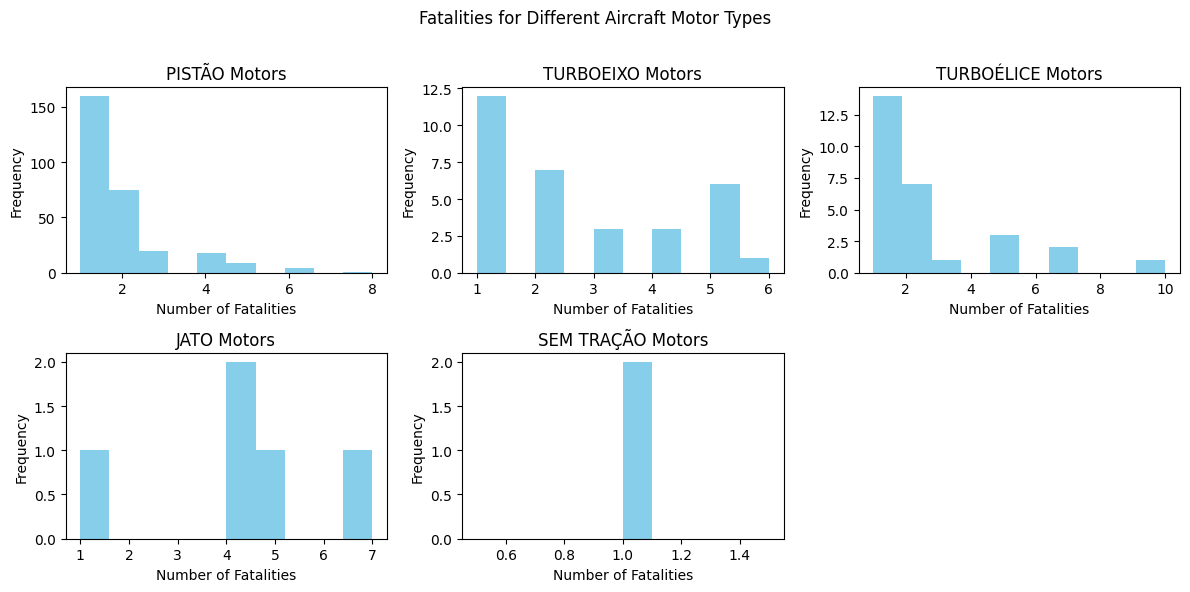

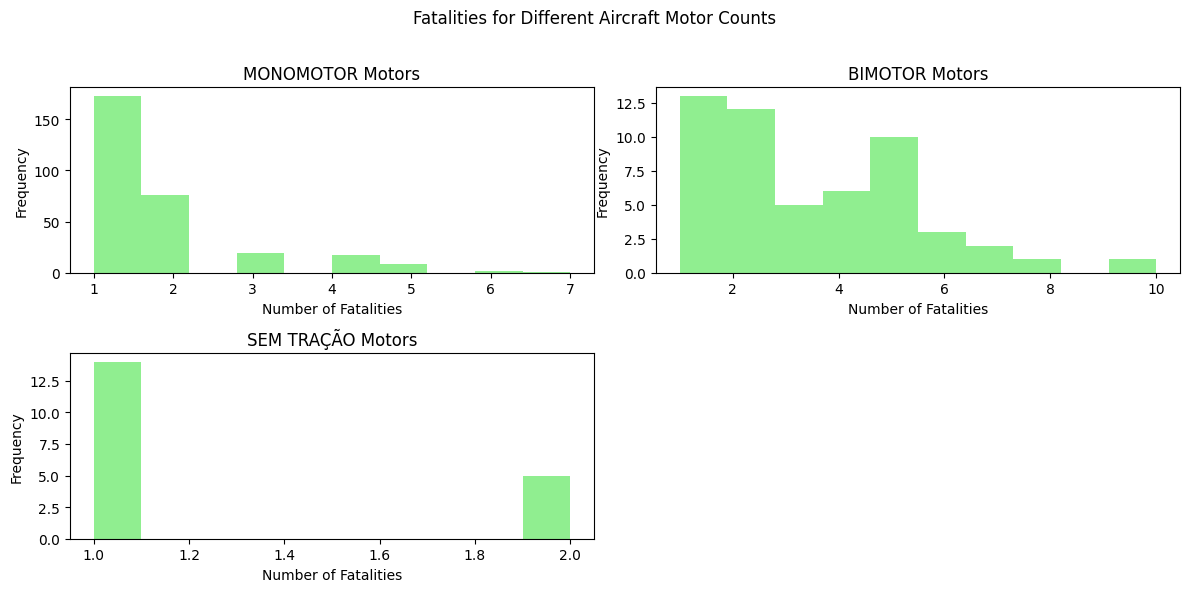

In [7]:
# @title
# Filter data for accidents with fatalities
anova_subset = aeronave[aeronave['aeronave_fatalidades_total'] > 0]

# Create a list of the unique values for each categorical variable
motor_types = anova_subset['aeronave_motor_tipo'].dropna().unique()
motor_counts = anova_subset['aeronave_motor_quantidade'].dropna().unique()

# Define the grouping intervals for year of fabrication
anova_subset['aeronave_ano_fabricacao'] = anova_subset['aeronave_ano_fabricacao'].replace(['NULL', 0], np.nan)
min_year = anova_subset['aeronave_ano_fabricacao'].dropna().min()
max_year = anova_subset[anova_subset['aeronave_ano_fabricacao'].between(1900, 2023)]['aeronave_ano_fabricacao'].dropna().max()
num_groups = 4  # You can adjust the number of groups
group_size = (max_year - min_year) / num_groups

# Create subplots for motor types
num_plots = len(motor_types)
num_rows = 2  # Adjust as needed
num_cols = num_plots // num_rows + (num_plots % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
fig.suptitle("Fatalities for Different Aircraft Motor Types")

for i, motor_type in enumerate(motor_types):
    row, col = i // num_cols, i % num_cols
    ax = axes[row, col]

    data = anova_subset[anova_subset['aeronave_motor_tipo'] == motor_type]['aeronave_fatalidades_total']
    ax.hist(data, bins=10, color='skyblue')
    ax.set_title(f'{motor_type} Motors')
    ax.set_xlabel('Number of Fatalities')
    ax.set_ylabel('Frequency')

for j in range(i + 1, num_rows * num_cols):
    row, col = j // num_cols, j % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# Create subplots for motor counts
num_plots = len(motor_counts)
num_rows = 2  # Adjust as needed
num_cols = num_plots // num_rows + (num_plots % num_rows > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
fig.suptitle("Fatalities for Different Aircraft Motor Counts")

for i, motor_count in enumerate(motor_counts):
    row, col = i // num_cols, i % num_cols
    ax = axes[row, col]

    data = anova_subset[anova_subset['aeronave_motor_quantidade'] == motor_count]['aeronave_fatalidades_total']
    ax.hist(data, bins=10, color='lightgreen')
    ax.set_title(f'{motor_count} Motors')
    ax.set_xlabel('Number of Fatalities')
    ax.set_ylabel('Frequency')

for j in range(i + 1, num_rows * num_cols):
    row, col = j // num_cols, j % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


- **Alternative Numerical Variable:** Recognizing the need for a more appropriate numerical variable, we explored an alternative approach. We considered transforming the time of occurrence ('ocorrencia_hora'), initially represented in the format HH:mm:SS, into "minutes after a specific hour" (i.e., minutes after midnight). This transformation allowed us to construct a histogram using time (converted to minutes) as our continuous numerical variable. We aimed to analyze the mean time of occurrences without excluding those without fatalities. This approach also facilitated the investigation of the relevance of the time of occurrence in accident analysis. Moreover, by correlating this variable with the categorical value of the occurrence date, we sought to assess whether the mean time of occurrence varied across different periods of the year. We selected this transformation based on its potential to yield a more suitable distribution. After a comprehensive assessment of our numerical variable options, we determined that "ocorrencia_hora" (measured in minutes after midnight) was the most suitable choice for our analysis (compared to the prior 'fatalities' variable) due to its improved distribution characteristics, as it is ilustrated by the following histograms.


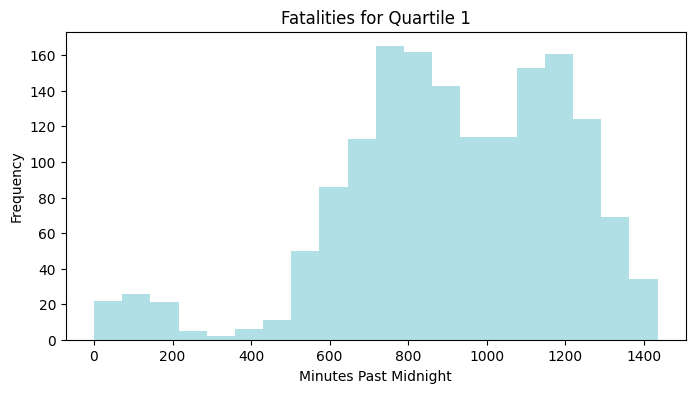

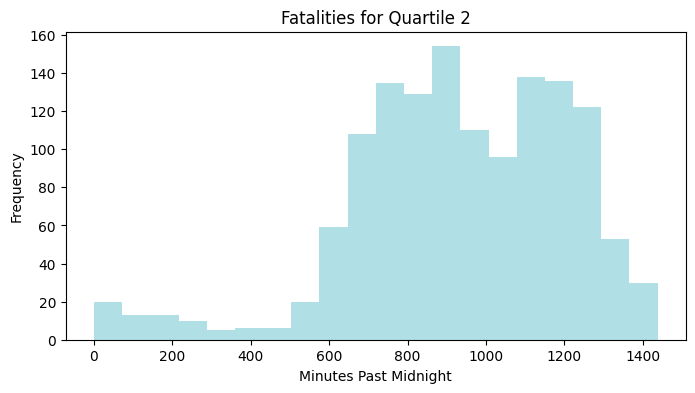

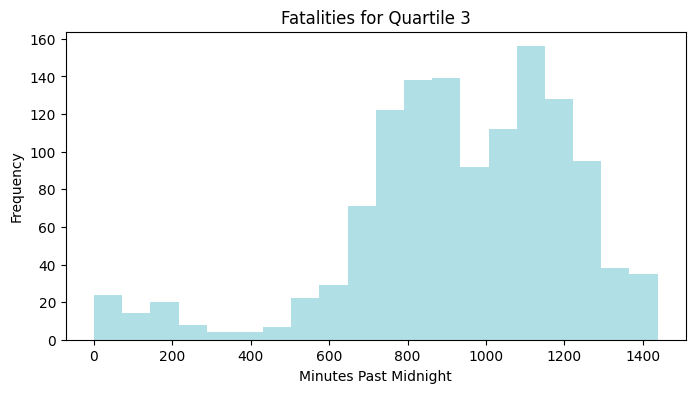

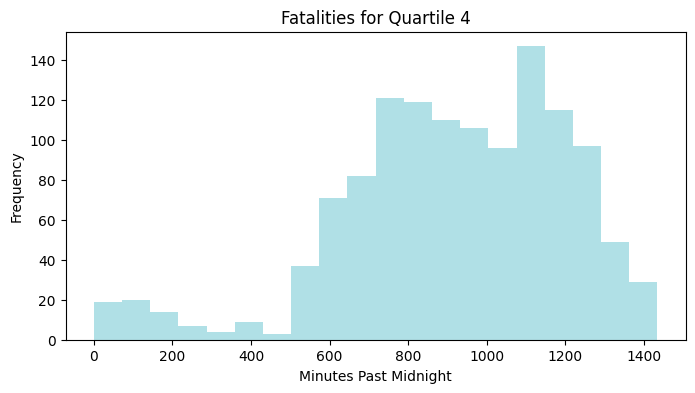

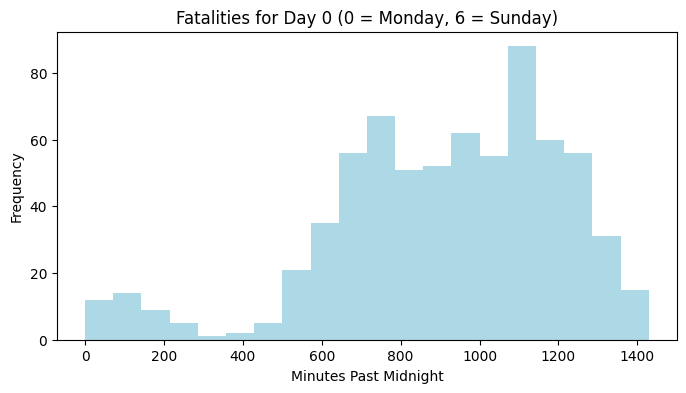

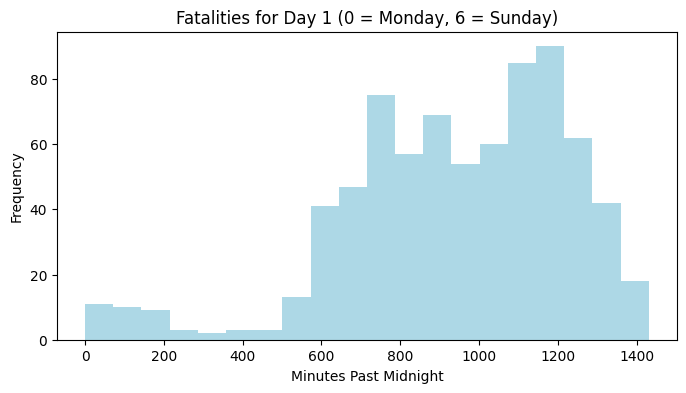

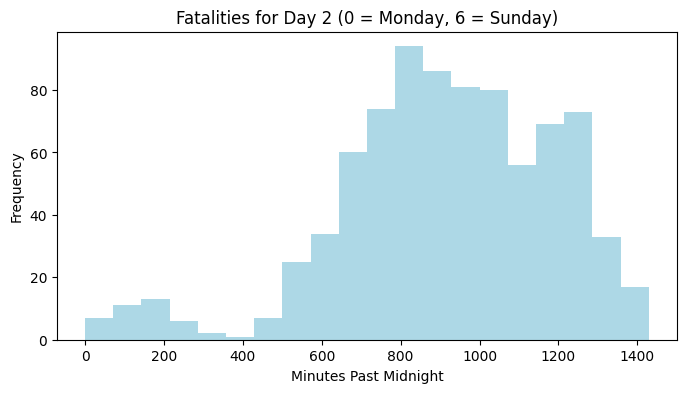

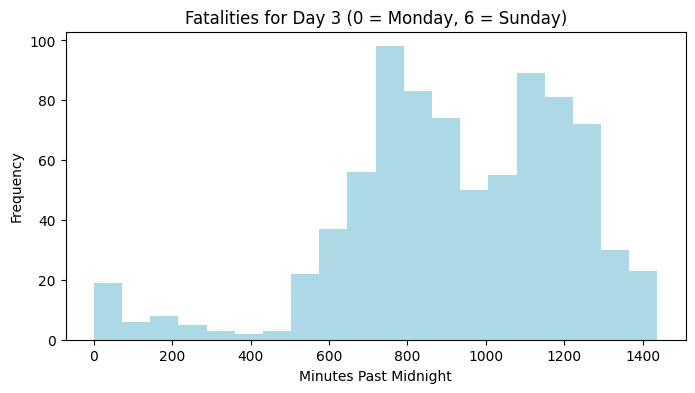

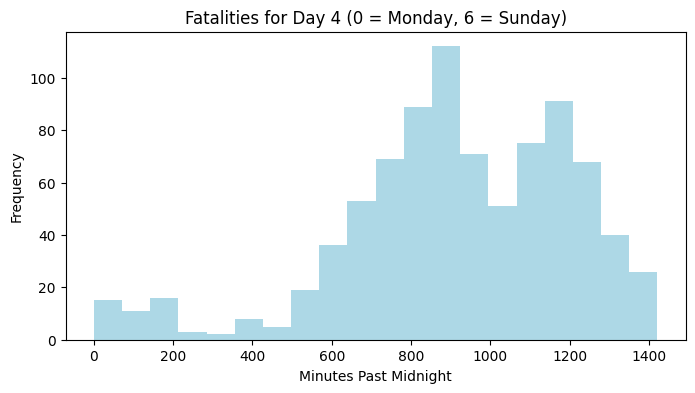

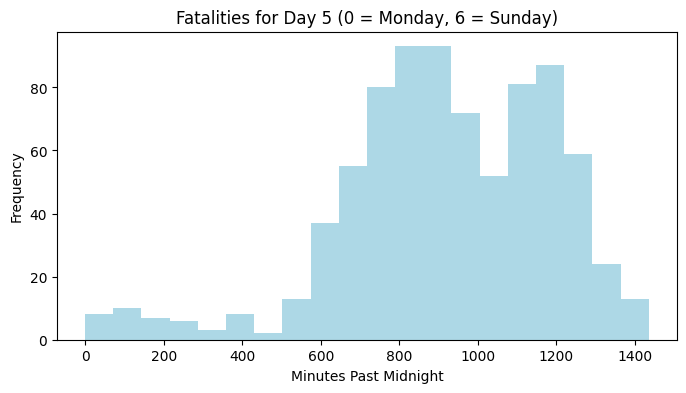

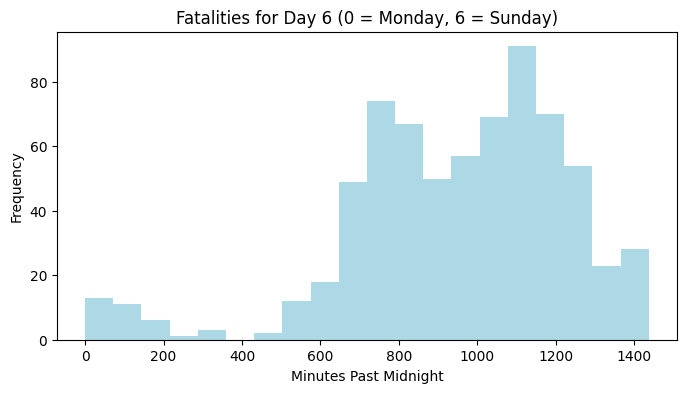

In [8]:
# @title
# Create a DataFrame with only 'ocorrencia_dia' and 'ocorrencia_hora' columns
df = ocorrencia[['ocorrencia_dia', 'ocorrencia_hora']].copy()

# Drop rows with missing values
df.dropna(subset=['ocorrencia_dia', 'ocorrencia_hora'], inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Convert date and time columns to datetime objects
df['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], format='%d/%m/%Y')
df['ocorrencia_hora'] = pd.to_datetime(df['ocorrencia_hora'], format='%H:%M:%S')

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['day_of_week'] = df['ocorrencia_dia'].dt.dayofweek

# Extract the minutes past midnight
df['time_of_day'] = df['ocorrencia_hora'].dt.hour * 60 + df['ocorrencia_hora'].dt.minute

# Calculate the quartile of the year
df['quartile_of_year'] = df['ocorrencia_dia'].dt.quarter

subset1 = df.copy()
subset2 = df.copy()

# Create histograms for each subset category

# Subset 1: Quartile of the year
for quartile in range(1, 5):
    plt.figure(figsize=(8, 4))
    plt.hist(subset1[subset1['quartile_of_year'] == quartile]['time_of_day'], bins=20, color='powderblue')
    plt.title(f'Fatalities for Quartile {quartile}')
    plt.xlabel('Minutes Past Midnight')
    plt.ylabel('Frequency')
    plt.show()

# Subset 2: Day of the week
for day in range(7):
    plt.figure(figsize=(8, 4))
    plt.hist(subset2[subset2['day_of_week'] == day]['time_of_day'], bins=20, color='lightblue')
    plt.title(f'Fatalities for Day {day} (0 = Monday, 6 = Sunday)')
    plt.xlabel('Minutes Past Midnight')
    plt.ylabel('Frequency')
    plt.show()



- **Choice of Transformation in Time:** After some trial and error, our experimentation with various transformations revealed that selecting "Minutes after 5 AM" resulted in a data distribution that more closely approximated normality when compared to "Minutes after midnight." Given the strong recommendation to utilize data with a distribution that approximates normality for ANOVA tests, we opted for the former transformation. This choice was influenced by the transformation's ability to address specific challenges presented by the original "Minutes after midnight" variable.


*Ploted 'minutes after 5AM' and 'minutes after midnight' histograms:*

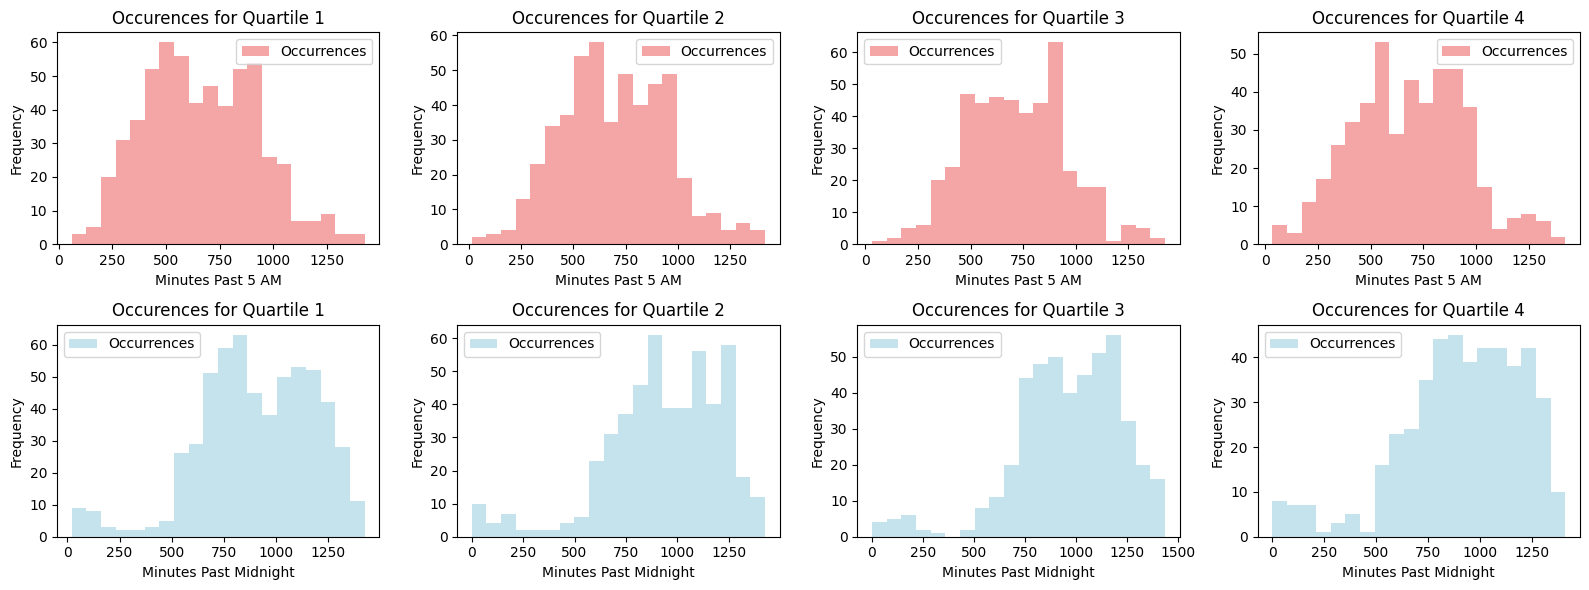

In [11]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

sample_3 = pd.read_csv('./resource/sample_3.csv')
#sample_3.info()
df = sample_3[['quartile_of_year', 'time_of_day']]
df['quartile_of_year'].replace({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}, inplace=True)

# Convert to minutes after 5 AM without negative values
df['time_after_5am'] = df['time_of_day'] - 300
df['time_after_5am'] = df['time_after_5am'].apply(lambda x: x if x >= 0 else x + 1440)

# Generating Quarter num for plot
def map_quarter_to_int(quarter_value):
    if quarter_value == "Q1":
        return 1
    elif quarter_value == "Q2":
        return 2
    elif quarter_value == "Q3":
        return 3
    elif quarter_value == "Q4":
        return 4
    else:
        # Handle other cases if needed
        return None  # or another default value

# Use the mapping function with the .apply() method to create the new column
df['quarter_num'] = df['quartile_of_year'].apply(map_quarter_to_int)

# Create histograms for each subset category

# Create a 2x4 grid for histograms
fig, axes = plt.subplots(2, 4, figsize=(16, 6))

# Create histograms for 'time_after_5am'
for quartile, ax in zip(range(1, 5), axes[0]):
    data = df[df['quarter_num'] == quartile]['time_after_5am']

    # Calculate IQR and bounds for identifying outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Highlight outliers in the histogram
    ax.hist(data, bins=20, color='lightcoral', alpha=0.7, label='Occurrences')
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    ax.set_title(f'Occurences for Quartile {quartile}')
    ax.set_xlabel('Minutes Past 5 AM')
    ax.set_ylabel('Frequency')
    ax.legend()

# Create histograms for 'time_of_day'
for quartile, ax in zip(range(1, 5), axes[1]):
    data = df[df['quarter_num'] == quartile]['time_of_day']

    # Calculate IQR and bounds for identifying outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Highlight outliers in the histogram
    ax.hist(data, bins=20, color='lightblue', alpha=0.7, label='Occurrences')
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    ax.set_title(f'Occurences for Quartile {quartile}')
    ax.set_xlabel('Minutes Past Midnight')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


- **Chosing categorical variable:** To select a categorical variable for correlation with the previously explained numerical variable, we segmented the accident dates into quartiles, effectively creating four quartiles within the year. We chose this approach as it aligned with our research objectives and allowed us to effectively categorize accident dates. Our intent was to apply ANOVA to investigate potential correlations between the quartile in which an accident occurred and the number of fatalities associated with it

### **Sampling Data**

After selecting the variables and doing the exploratory analysis, we sampled the dataset with sample size of `n=2000`.

In [12]:
# @title
# Create a DataFrame with only 'ocorrencia_dia' and 'ocorrencia_hora' columns
df_raw = ocorrencia[['ocorrencia_dia', 'ocorrencia_hora']].copy()

# Drop rows with missing values
df_raw.dropna(subset=['ocorrencia_dia', 'ocorrencia_hora'], inplace=True)

# Reset the index of the DataFrame
df_raw.reset_index(drop=True, inplace=True)

# Convert date and time columns to datetime objects
df_raw['ocorrencia_dia'] = pd.to_datetime(df_raw['ocorrencia_dia'], format='%d/%m/%Y')
df_raw['ocorrencia_hora'] = pd.to_datetime(df_raw['ocorrencia_hora'], format='%H:%M:%S')

# Extract the minutes past midnight
df_raw['time_of_day'] = df_raw['ocorrencia_hora'].dt.hour * 60 + df_raw['ocorrencia_hora'].dt.minute
#df_raw['time_of_day'] = df_raw['time_of_day'] + 1e-10

# Creating LOG column to normalize (compare the histograms and choose the best one)
#df_raw['time_of_day_log'] = np.log(df_raw['time_of_day'])

# Creating BOX-COX column to normalize (compare the histograms and choose the best one)
#transformed_data, lambda_value = stats.boxcox(df_raw['time_of_day'])
#df_raw['time_of_day_boxcox'] = transformed_data

# Calculate the quartile of the year
df_raw['quartile_of_year'] = df_raw['ocorrencia_dia'].dt.quarter

#Raw dataset used to generate random sample 'sample_3.csv'


## **Graphical diagnostics for an ANOVA analysis**



### **1. Independence:** If the data are a simple random sample, this condition is satisfied. We picked a random sample from size `n=2000` out of the raw dataset (`n=5547`). There are no obvious reasons why independence would not hold for most or all observations in this case, so Indepence were assumed.



### **2. Approximately normal:** A histogram of the observations from each group is shown below. Since each of the groups (quartiles of the year) we’re considering have relatively large sample sizes, what we’re looking for are major outliers. None are apparent, so this conditions is reasonably met, we can double check for normality also using the Shapiro test. The results were showed after the histograms.

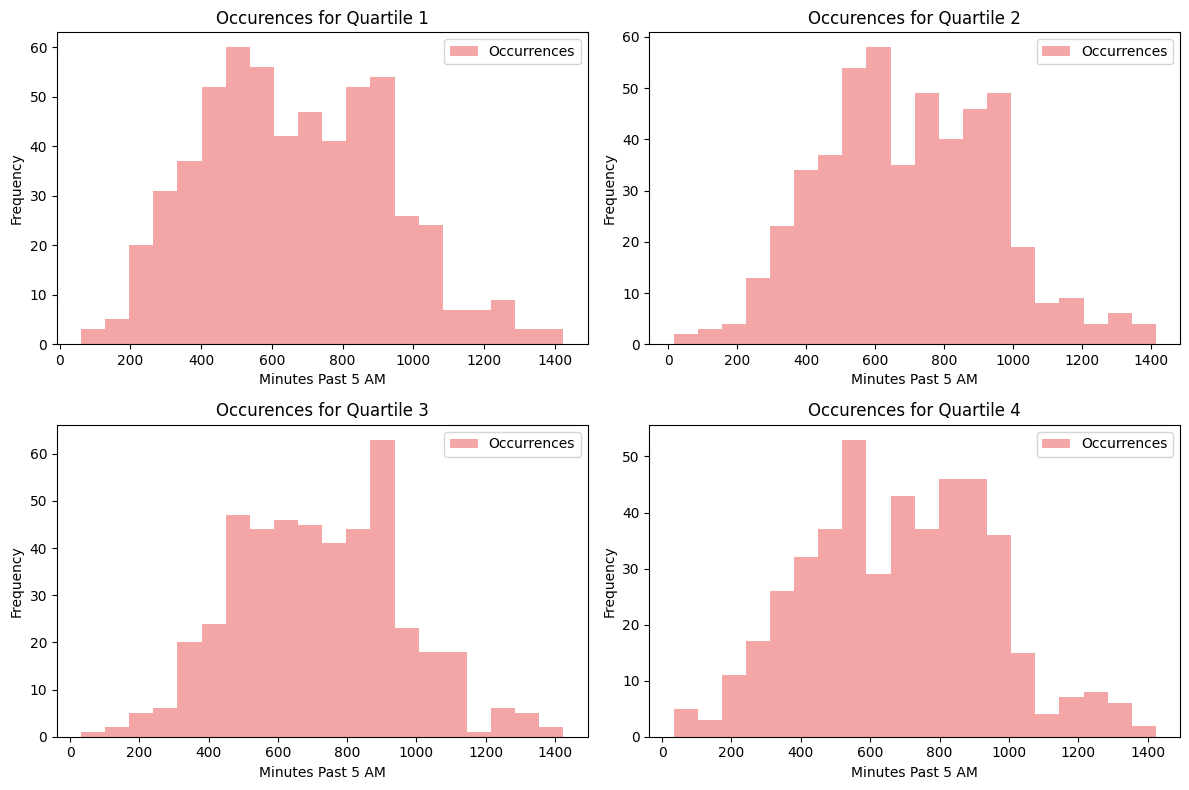

In [15]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

sample_3 = pd.read_csv('./resource/sample_3.csv')
#sample_3.info()
df = sample_3[['quartile_of_year','time_of_day']]
df['quartile_of_year'].replace({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}, inplace= True)

# Convert to minutes after 5 AM without negative values
df['time_after_5am'] = df['time_of_day'] - 300
df['time_after_5am'] = df['time_after_5am'].apply(lambda x: x if x >= 0 else x + 1440)

#Generating Quarter num for plot
def map_quarter_to_int(quarter_value):
    if quarter_value == "Q1":
        return 1
    elif quarter_value == "Q2":
        return 2
    elif quarter_value == "Q3":
        return 3
    elif quarter_value == "Q4":
        return 4
    else:
        # Handle other cases if needed
        return None  # or another default value

# Use the mapping function with the .apply() method to create the new column
df['quarter_num'] = df['quartile_of_year'].apply(map_quarter_to_int)

# Create histograms for each subset category

# Create a 2x2 grid for histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for quartile, ax in zip(range(1, 5), axes.flatten()):
    data = df[df['quarter_num'] == quartile]['time_after_5am']

    # Calculate IQR and bounds for identifying outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Highlight outliers in the histogram
    ax.hist(data, bins=20, color='lightcoral', alpha=0.7, label='Occurrences')
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    ax.set_title(f'Occurences for Quartile {quartile}')
    ax.set_xlabel('Minutes Past 5 AM')
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()

Shapiro-Wilk Statistic: 0.9927992820739746
P-Value: 2.4379815499742108e-08
According to Shapiro-Wilk test, this sample does not look normally distributed


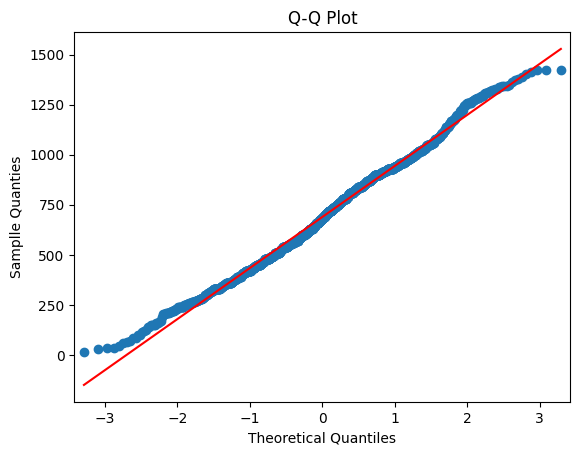

In [17]:
# @title
from scipy.stats import shapiro
import statsmodels.api as sm

# Sample data
data = df['time_after_5am']

# Perform the Shapiro-Wilk test
shapiro_stat, p_value = shapiro(data)

# Display the test statistic and p-value
print(f'Shapiro-Wilk Statistic: {shapiro_stat}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print('Sample looks normally distributed')
else:
    print('According to Shapiro-Wilk test, this sample does not look normally distributed')


# Q-Q Plot
sm.qqplot(data, line='s')

plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Samplle Quanties')

plt.show()


**Normality Assumption:** The histograms look reasonably normally distributed, but the low p-value from the Shapiro-Wilk test indicates that the distribution isn't normal. Analyzing the Q-Q Plot, it is shown that a small part of the data, in the lower values, doesn't follow the expected distribution. As it is a small fraction of the sample, we'll assume normality.

**Robustness of ANOVA:** ANOVA is known for its robustness to deviations from normality, especially with large sample sizes. If the assumptions of homogeneity of variance are met (groups have roughly equal variances), the ANOVA test can still provide valid results even if the data isn't perfectly normally distributed.

**Histograms additional observations:** The histograms reveal sutil patterns in the distribution of accidents based on time of the occurence (tranformed into minutes after midnight) for different quartiles of the year, offering insights into the unique characteristics of accidents within the Brazilian context. Let's delve into the key observations:

- **Peaks Around 500 and 900 Minutes after 5AM (Around 13:20 and 20:00):** Notably, there are distinct peaks in the distribution at approximately 500 and 900 minutes after midnight. In the first, second and fourth quartiles, the higher peak occurs around 500 minutes (around 13:20 or 1:20 PM), with a slightly smaller peak around 900 minutes (around 20:00 or 8:00 PM). In contrast, during the third quartiles, the higher peak shifts to approximately 900 minutes (around 20:00 or 8:00 PM), with no major secondary peak.

- **Approximate Normal Distribution:** The overall pattern of the distribution appears to approximate a normal distribution, with a sutble left skew. This suggests that afternoon and early evening hours may pose a higher risk of occurrences.


### **3. Constant Variance:** The last assumption is that the variance in the groups is about equal from one group to the next. This assumption can be checked by examining a side-by-side box plot of the outcomes across the groups:

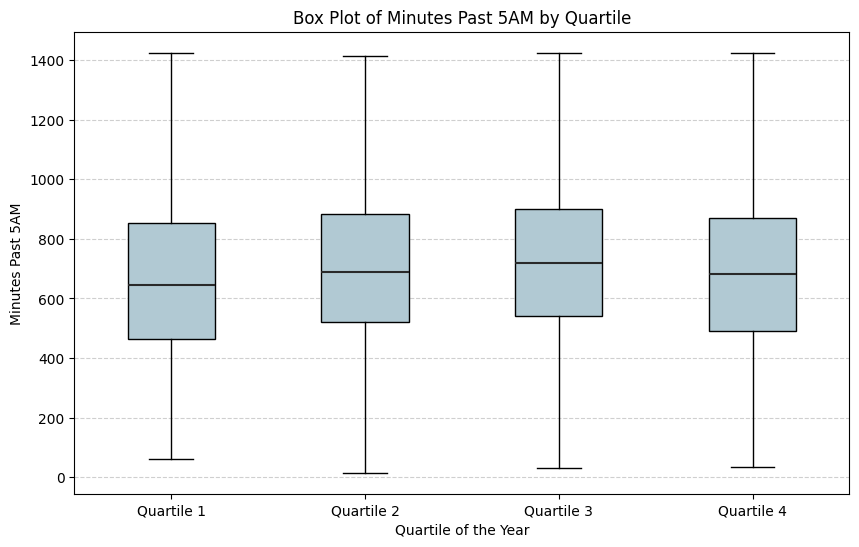

In [19]:
# @title

#Box Plot code without liers
# Create a box plot for the outcomes (minutes past midnight) across quartiles
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['quarter_num'] == 1]['time_after_5am'],
             df[df['quarter_num'] == 2]['time_after_5am'],
             df[df['quarter_num'] == 3]['time_after_5am'],
             df[df['quarter_num'] == 4]['time_after_5am']],
            labels=['Quartile 1', 'Quartile 2', 'Quartile 3', 'Quartile 4'], patch_artist = True,
          boxprops = dict(facecolor = "#b1c9d3"),
          medianprops = dict(color = "#292929", linewidth = 1.5))
plt.xlabel('Quartile of the Year')
plt.ylabel('Minutes Past 5AM')
plt.title('Box Plot of Minutes Past 5AM by Quartile')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Box Plot Observations (Revise this Later):**
- **Similar Box Heights**: The sizes of the boxes in the box plots are similar, indicating consistent variance in accident occurrences across the quartiles of the year. Although not identical, the variances are comparable, suggesting relatively uniform variability in accident patterns by time of day throughout the year.

- **Median Lines**: The median lines within the boxes are close to each other, indicating that the central tendencies (medians) of the distributions are relatively similar across all quartiles.


- **Homogeneity of Variance:** The absence of outliers suggests that the variance within each quartile may be relatively consistent or homogeneous. This is one of the assumptions of ANOVA, known as homogeneity of variance or homoscedasticity. We can use the Levene Statistical Test to evaluate the homogeneity of groups.

- **Robustness of ANOVA:** ANOVA is known for its robustness to deviations from normality, especially when sample sizes are reasonably large. The lack of outliers is an indicator that the distribution within each quartile is relatively symmetrical and doesn't contain extreme values, making ANOVA a more appropriate choice for comparing means among the groups.

- **Improved Statistical Power:** Outliers can negatively impact the statistical power of the ANOVA test, potentially leading to Type I errors (false positives) or reduced sensitivity. When outliers are not present, ANOVA is more likely to accurately detect true group differences if they exist.


**In summary, the side-by-side box plots reveal that the variance in accident occurrences by time of day maintains a consistent pattern throughout the year. The overall distribution of occurences by time of day maintains similar patterns, making it a suitable variable for further analysis and hypothesis testing.**


In [20]:
# @title
# Calculate sample statistics
quartiles = [1, 2, 3, 4]
sample_sizes = [len(df[df['quarter_num'] == q]) for q in quartiles]
sample_means = [df[df['quarter_num'] == q]['time_after_5am'].mean() for q in quartiles]
sample_std = [df[df['quarter_num'] == q]['time_after_5am'].std() for q in quartiles]

groups = df['quarter_num'].unique()
grouped_data = [df[df['quarter_num'] == group]['time_after_5am'] for group in groups]

statistic, p_value = stats.levene(*grouped_data)
if p_value < 0.05:
    print("According to the Levene's test, the variances are significantly different among the groups.")
else:
    print("According to the Levene's test, the variances are not significantly different, suggesting homogeneity.")

# Create a DataFrame
sample_stats = pd.DataFrame({'Size': sample_sizes,
                             'Mean': sample_means,
                             'Std Dev': sample_std},
                            index=['Q1', 'Q2', 'Q3', 'Q4']
                            )

# Transpose the DataFrame
sample_stats = sample_stats.T

# Display the sample statistics
print('Summary of Statistics for each group (quartile):')
sample_stats

According to the Levene's test, the variances are not significantly different, suggesting homogeneity.
Summary of Statistics for each group (quartile):


,Q1,Q2,Q3,Q4
Size,579.000000,497.000000,461.000000,463.000000
Mean,663.376511,697.895372,717.056399,684.164147
Std Dev,259.344369,253.043118,238.301985,264.878006


**Sample Statistics and Quartile Analysis:**

The summary table provides statistics for four groups, likely representing quartiles (Q1, Q2, Q3, and Q4), which could be segments of data or categories. Here's a brief interpretation:

- **Size:** Indicates the number of data points in each group. Q2 has the smallest size (497), while Q3 is the largest (461).

- **Mean:** Represents the average value within each group. Q3 has the highest mean (717.06), suggesting higher values, while Q1 has the lowest mean (663.38), indicating lower values.

- **Std Dev:** Shows the standard deviation, which is a measure of the spread or dispersion of data within each group. Q1 and Q2 have similar standard deviations, while Q3 has the lowest standard deviation (indicating less variability), and Q4 has the highest standard deviation (indicating more variability).

In summary, the table provides an overview of the size, central tendency (mean), and spread (standard deviation) of data for each of the four groups. Further investigation can explore the factors contributing to these patterns, providing insights for safety measures and interventions during specific periods of the day.


## **Hypothesis**

**Null Hypothesis (H0):** There is no statistically significant difference between the average time of the day that the occurrences happened in each quartile of the year (µQ1 = µQ2 = µQ3 = µQ4).

**Alternative Hypothesis (H1):** The average time of the day that the occurrences happened significantly varies across at least one quartile of the year (µi), where i represents each quartile (Q1, Q2, Q3, Q4).


## **Performing the F-Test**






In this section, we will perform an F-test. This statistical test will help us determine whether the quartile of the year significantly influences the timing of aircraft occurrences throughout the day. The steps are as follows:

**Chosen significance level: 0.05**

### **One-way ANOVA using spicy.stats:**
Conducting an one-way ANOVA using scipy.stats is quick and only returns the resulting F-statistic and p-value of the test.




In [21]:
# @title
f_statistic, p_value = stats.f_oneway(df['time_after_5am'][df['quartile_of_year'] == 'Q1'],
               df['time_after_5am'][df['quartile_of_year'] == 'Q2'],
               df['time_after_5am'][df['quartile_of_year'] == 'Q3'],
               df['time_after_5am'][df['quartile_of_year'] == 'Q4'])

# Print the results
print(f'F-Statistic: {f_statistic:.4f}')
print(f'P-Value: {p_value:.4f}')

# Determine if the result is statistically significant
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences among group means.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences among group means.")

F-Statistic: 4.0853
P-Value: 0.0067
Reject the null hypothesis: There are significant differences among group means.


### **One-way ANOVA using statsmodel:**
This method conducts a one-way ANOVA in two steps:

- Fit the model using an estimation method.
- Pass fitted model into ANOVA method to produce ANOVA table.

In [22]:
# @title
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('time_of_day ~ C(quartile_of_year)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA table:")
aov_table

ANOVA table:


,sum_sq,df,F,PR(>F)
C(quartile_of_year),9.746394e+05,3.0,4.085363,0.006661
Residual,1.587277e+08,1996.0,NaN,NaN


The results obtained using SciPy's `stats` library are consistent with the results obtained through StatsModels. The primary difference is that StatsModels provides a more detailed ANOVA table with additional information. The interpretation below is based on the ANOVA table obtained through StatsModels.

- **Statistical Significance:** The low p-value of 0.0067 indicates that there are significant differences among the group means. In the context of ANOVA, this means that at least one group mean is different from the others.

- **Sample Size:** With a large sample size of 2,000, the ANOVA test is more likely to detect even small differences among the groups, making it more sensitive to departures from the null hypothesis.

- The **"C(quartile_of_year)"** row indicates that the variation between quartiles of the year is statistically significant (p-value < 0.05). In other words, there are significant differences among the means of the quartiles.

- The **F-statistic** (4.085363) indicates the ratio of the variation between quartiles to the variation within quartiles. A larger F-statistic suggests more significant differences between groups.

- The **"Residual"** row represents the unexplained variation within the groups, which is expected to be substantial given the large sample size.

**In summary, the ANOVA results, supported by the low p-value and a significant F-statistic, suggest that there are significant differences among the group means. The Shapiro-Wilk test's low p-value may be attributed to the test's sensitivity with a large sample size, but this doesn't necessarily invalidate the ANOVA findings. The robustness of ANOVA, combined with the practical significance of the differences among the groups, should be considered when interpreting the results. In other words, the quartile_of_year variable appears to have a statistically significant effect on the "time of day" variable.**

**Therefore, we can conclude that there are significant differences in the timing of aircraft occurrences across different quartiles of the year. Further post-hoc tests or pairwise comparisons may be conducted to determine which specific quartiles are different from each other. Additionally, it's possible to explore the practical significance of these differences to gain a deeper understanding of the impact of quartiles on the timing of aircraft occurrences.**


In [23]:
# @title
import numpy as np
import scipy.stats as stats

# Calculate the number of quartiles (k)
k = len(df['quarter_num'].unique())
n = len(df)

print(f'k = {k} ')
print(f'n = {n} ')

# Set the significance level (alpha) and the degrees of freedom
alpha = 0.05

df_between = k - 1
df_within = n - k

print(f"F distribution with {df_between} and {df_within} degrees of freedom")

# Calculate the critical value from the F-distribution
critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Calculate the p-value
p_value = 1 - stats.f.cdf(f_statistic, df_between, df_within)

# Print the results
print(f"F-Statistic: {f_statistic:.4f}")
print(f"F-Critical Value: {critical_value:.4f}")
print(f"P-Value: {p_value}")

k = 4 
n = 2000 
F distribution with 3 and 1996 degrees of freedom
F-Statistic: 4.0853
F-Critical Value: 2.6094
P-Value: 0.006661618969545757


### **Ploting the F-distribution**

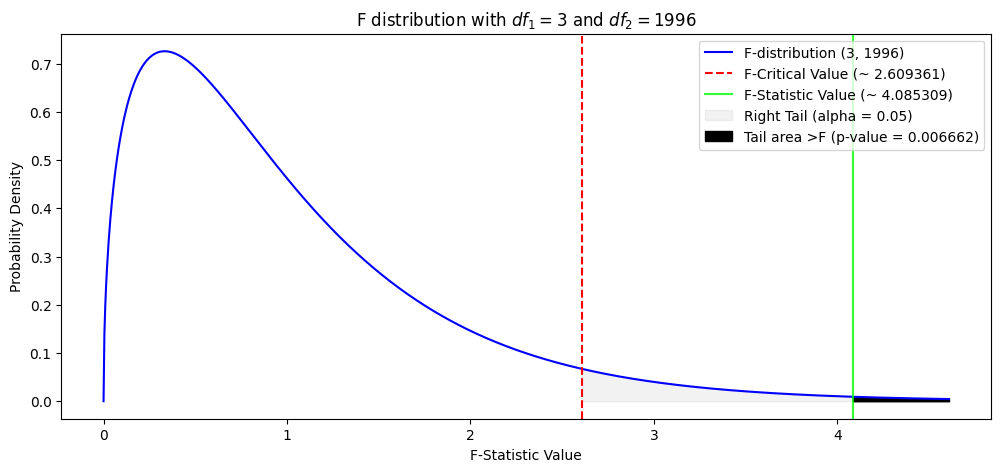

In [24]:
# @title
# Set the degrees of freedom for the numerator (dfn) and denominator (dfd)
dfn = df_between
dfd = df_within

# Generate x values for the F-distribution
x = np.linspace(0, critical_value + 2, 1000)  # Adjust the range as needed

# Calculate the probability density function (PDF) for the F-distribution
pdf = stats.f.pdf(x, dfn, dfd)

# Create the F-distribution plot with a zoomed-in area
plt.figure(figsize=(12,5))
plt.plot(x, pdf, label=f'F-distribution ({dfn}, {dfd})', color='b')

# Adding a line for the F critical and F values
plt.axvline(critical_value, color='red', linestyle='--', label=f'F-Critical Value (~ {critical_value:4f})')
plt.axvline(f_statistic, color='lime', linestyle='-', alpha=0.8, label=f'F-Statistic Value (~ {f_statistic:4f})')

# Highlight the tails based on critical value and alpha
tail_alpha = 0.05  # Significance level for highlighting
highlight_x = np.linspace(critical_value, x[-1], 1000)
highlight_y = stats.f.pdf(highlight_x, dfn, dfd)

plt.fill_between(highlight_x, 0, highlight_y, color='grey', alpha=0.1, label=f'Right Tail (alpha = {tail_alpha})')

# Highlight the tails based on F-statistic and p-value
highlight_p = np.linspace(f_statistic, x[-1], 1000)
highlight_t = stats.f.pdf(highlight_p, dfn, dfd)

plt.fill_between(highlight_p, 0, highlight_t, color='black', alpha=1, label=f'Tail area >F (p-value = {p_value:2f})')

# Set labels and title for the zoomed-in plot
plt.xlabel('F-Statistic Value')
plt.ylabel('Probability Density')
plt.title(f'F distribution with $df_1 = {dfn}$ and $df_2 = {dfd}$')
plt.legend()

# Show the zoomed-in plot
plt.show()


**This plot showcases the separation between the F-statistic and the critical value. The extended right tail of the F-distribution demonstrates the low likelihood of obtaining such a strong F-statistic under the null hypothesis. The upper tail area highlights the infinitesimal p-value, affirming the strong evidence against the null hypothesis.**


The table below provides a summary of the key parameters and results from the statistical test:

| Parameters                   | Values               |
|------------------------------|----------------------|
| Number of Groups (k)      | 4                    |
| Total Data Points (n)        | 2,000                |
| Degrees of Freedom (DF)      | 3 (Between) / 1996 (Within) |
| F-Statistic                 | 4.0853        |
| F-Critical Value (alpha = 0.05) | 2.6138                 |
| P-Value                     | ≈ 0.00666        |

**In conclusion, the F-statistic exceeds the critical value, leading to the rejection of the null hypothesis. The p-value, approximately 0.00666, is lower than the significance level (0.05), further strengthening the evidence against the null hypothesis.**

**These results establish a compelling case for the influence of seasonal variations in aviation safety, validated by the ANOVA methodology.**

**Important Note:** It's essential to clarify that while statistical tests can establish an association between variables, they do not provide insights into causality. In other words, they can't explain why or how the variables are related. To gain a deeper understanding of the underlying reasons for these associations and to develop practical recommendations, further domain-specific analysis and knowledge are often necessary. These statistical findings should serve as a foundational starting point for more in-depth investigations and informed decision-making in the realm of aircraft safety and accident prevention.


## Post Hoc


These findings raise intriguing questions that warrant further exploration. Investigating the specific factors associated with these patterns, such as climate, regional variations, and potential causal factors, may provide valuable insights into the nuances of accident occurrences in the Brazilian context. Additional statistical tests and domain-specific knowledge could be employed to gain a deeper understanding of the underlying causes and implications of this distribution. For this, we use Tukey's HSD test to evaluate pairwisely if there are statistically significant differences in the average time of the day between the quartiles analyzed.




In [25]:
# @title Tukey HSD (Honestly Significant Difference) Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(df['time_of_day'], df['quartile_of_year'])
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
print("Tukey's HSD test results:")
tukey_df

Tukey's HSD test results:


,group1,group2,meandiff,p-adj,lower,upper,reject
0,Q1,Q2,22.5940,0.5564,-21.7433,66.9314,False
1,Q1,Q3,55.2930,0.0092,10.0336,100.5523,True
2,Q1,Q4,0.8590,1.0000,-44.3459,46.0639,False
3,Q2,Q3,32.6989,0.2768,-14.1863,79.5841,False
4,Q2,Q4,-21.7350,0.6312,-68.5676,25.0976,False
5,Q3,Q4,-54.4339,0.0178,-102.1403,-6.7276,True


With this test, we can check pairwisely which groups have significant differences. As the table above shows, the pairs Q1vsQ3 and Q3vsQ4 demonstrate significant difference in the average time of day between the represented groups. The other comparisons didn't demonstrate the same event. Hence, it can be inferred that the average occurrence times between Q1 vs. Q2, Q1 vs. Q4, Q2 vs. Q3, and Q2 vs. Q4 do not exhibit statistically significant variation.

# 3.Inference for proportion: The proportion of incidents that resulted in recommendations is different in the states of Rio de Janeiro and São Paulo?

### **Research Question 3:** "Is the proportion of accidents that resulted in recommendations different in Rio de Janeiro and São Paulo?"

Rio de Janeiro and São Paulo are the cities with the highest values of accidents, as we confirm below with the aid of plots and visualization. We'd like to analyse if there is indeed a difference in the number of recommendations being issued per accident in any of these cities rather than the other.

### **Choosing variables**

The chosen variables were the number of occurrences for each city, and the number of recommendations for Rio de Janeiro and São Paulo. The selection of these variables was driven by the curiosity to examine if there is any association between them, which can ultimately inform interventions and decision-making in the aviation safety landscape.

## **Hypothesis**

**Null Hypothesis (H0):** There is no significant difference in the proportion of occurrences with recommendations between Rio de Janeiro and São Paulo. µ(p(Rio)) = µ(p(São Paulo))

**Alternative Hypothesis (H1):** There is a significant difference in the proportion of occurrences with recommendations between Rio de Janeiro and São Paulo. µ(p(Rio)) != µ(p(São Paulo))

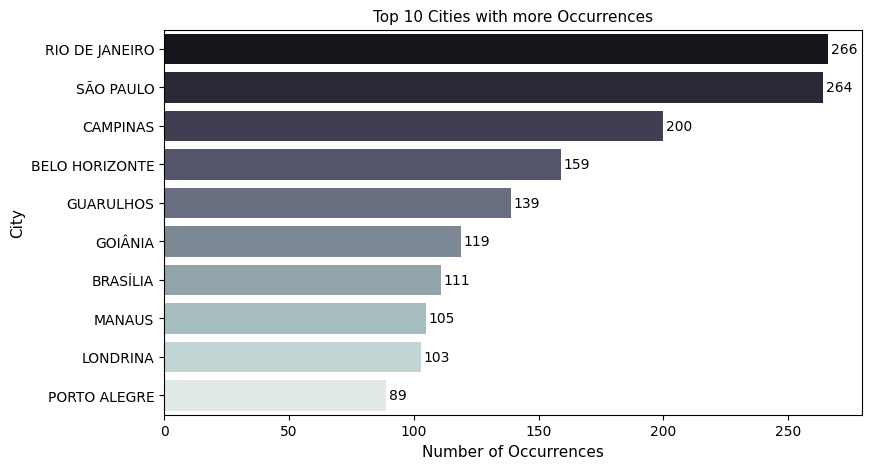

In [ ]:
top_cities = ocorrencia.ocorrencia_cidade.value_counts().head(10)
plt.figure(figsize=(9, 5))
plot = sns.barplot(x=top_cities.values, y=top_cities.index, palette="bone")
plt.xlabel("Number of Occurrences", fontsize=11)
plt.ylabel("City", fontsize=11)
plt.title("Top 10 Cities with more Occurrences", fontsize=11)

for i, v in enumerate(top_cities.values):
    plt.text(v + 1, i, str(v), color='black', va='center', fontsize=10)

plt.show()

In [ ]:
rio_de_janeiro_data = ocorrencia[ocorrencia['ocorrencia_cidade'] == 'RIO DE JANEIRO']
sao_paulo_data = ocorrencia[ocorrencia['ocorrencia_cidade'] == 'SÃO PAULO']

rio_de_janeiro_recom = rio_de_janeiro_data['total_recomendacoes'].sum()
sao_paulo_recom = sao_paulo_data['total_recomendacoes'].sum()

print("Rio de Janeiro:", rio_de_janeiro_recom)
print("São Paulo:", sao_paulo_recom)

Rio de Janeiro: 42
São Paulo: 22


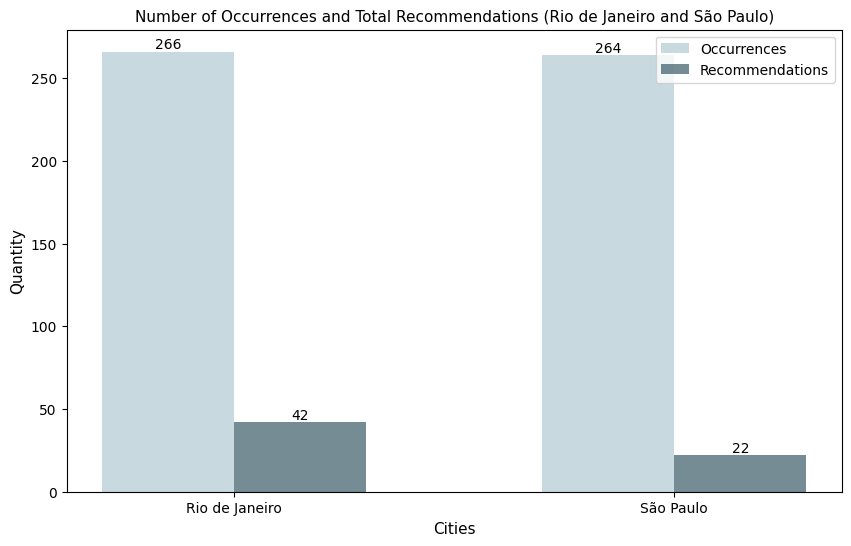

In [ ]:
rio_de_janeiro_ocorrencias = len(rio_de_janeiro_data)
sao_paulo_ocorrencias = len(sao_paulo_data)

cities = ['Rio de Janeiro', 'São Paulo']
ocorrencias = [rio_de_janeiro_ocorrencias, sao_paulo_ocorrencias]
recomendacoes = [rio_de_janeiro_recom, sao_paulo_recom]

plt.figure(figsize=(10, 6))
bar_width = 0.30
index = range(len(cities))

colors = plt.get_cmap('bone')(np.linspace(0, 1, len(cities)))
plt.bar(index, ocorrencias, bar_width, label='Occurrences', color="#b1c9d3",  alpha=0.7)
plt.bar([i + bar_width for i in index], recomendacoes, bar_width, label='Recommendations', color='#3A5B68', alpha=0.7)

for i, value in enumerate(ocorrencias):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

for i, value in enumerate(recomendacoes):
    plt.text(i + bar_width, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel('Cities', fontsize=11)
plt.ylabel('Quantity', fontsize=11)
plt.title('Number of Occurrences and Total Recommendations (Rio de Janeiro and São Paulo)', fontsize=11)
plt.xticks([i + bar_width / 2 for i in index], cities)
plt.legend()
plt.show()

#### Calculate z_stat and p_value
- The Z statistic: This value represents how many standard deviations the difference between the observed proportions is from the expected value.
- The p-value: This value is the probability of observing a difference in the observed proportions if the null hypothesis is true.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

rj_total_occ = ocorrencia[ocorrencia['ocorrencia_cidade'] == 'RIO DE JANEIRO']['total_recomendacoes']
sp_total_occ = ocorrencia[ocorrencia['ocorrencia_cidade'] == 'SÃO PAULO']['total_recomendacoes']

#count = np.array([len(rj_recomendacoes[rj_recomendacoes > 0]), len(sp_recomendacoes[sp_recomendacoes > 0])])
#nobs = np.array([len(rj_recomendacoes), len(sp_recomendacoes)])

rio_de_janeiro_recom = rio_de_janeiro_data['total_recomendacoes'].sum()
sao_paulo_recom = sao_paulo_data['total_recomendacoes'].sum()

count_rj = rio_de_janeiro_recom
count_sp = sao_paulo_recom
nobs_rj = sum(rj_total_occ.value_counts())
nobs_sp = sum(sp_total_occ.value_counts())

alpha = 0.05

z, p_value = proportions_ztest([count_rj, count_sp], [nobs_rj, nobs_sp], alternative='two-sided')

print("Z-Stat:", z)
print("P-Value:", p_value)

if p_value < alpha:
    print("""\nAs the p-value is less than the significance level, we can reject the null hypothesis.
This implies that there is a statistically significant difference
in the proportions of occurrences with recommendations between Rio de Janeiro and São Paulo.""")

else:
    print("""\nAs the p-value is greater than the significance level, we cannot reject the null hypothesis.
This means that there is no statistical evidence to suggest that
the proportions are different between the two cities.""")

Z-Stat: 2.633976194740235
P-Value: 0.008439140448739729

As the p-value is less than the significance level, we can reject the null hypothesis.
This implies that there is a statistically significant difference
in the proportions of occurrences with recommendations between Rio de Janeiro and São Paulo.


# **Critique and Limitations**

During the exploratory analysis phase of this project, we encountered a challenge in the limited availability of obvious numerical variables for our study. A significant portion of the dataset contained occurrences with zero fatalities, making the distribution of the numerical variable highly skewed and deviating from the assumptions of a normal distribution, a fundamental requirement for statistical tests such as ANOVA.

In addressing this challenge, we found that a substantial amount of our project's focus was shifted towards data preparation rather than the actual execution of statistical tests. Real-world data is not always perfect or normally distributed, and this project exemplified the importance of meticulous data cleansing and variable selection. While we initially aimed to delve deeply into various statistical tests and their applications, we found that a substantial investment of time and effort was required to ensure that the data was suitable for analysis.

Moreover, it is essential to recognize that while we have identified correlations between certain variables, correlation does not imply causality. Our findings provide valuable insights into associations, but causative relationships are a more complex matter. This distinction is vital when interpreting our results and underscores the need for caution in drawing causal inferences from our statistical analysis.
